In [1]:
from IPython.core.display import clear_output
from codex.F_search import *
from codex.classDarkSUSY import *
# from codex.histograms import *
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

Delphes_DIR = "/home/franky8939/PROGRAMAS/MG5_aMC_v2_6_7/Delphes/"
ROOT_DIR = "/home/franky8939/PROGRAMAS/root-6.18.02/"
ROOT = fbash(Delphes_DIR, ROOT_DIR)  # path in bash

# CLASE DARKSUSY
DarkFile = DarkSUSY()  # inicializar la clase

Welcome to JupyROOT 6.18/04


In [2]:
def FindROOT(Event0, Mass0, Tc0, Dir):
    # localizar el archivo respectivo
    outfileROOT = None
    for fileROOT in os.listdir(Dir):
        #print Event0, Mass0, Tc0, fileROOT
        if (fileROOT.find(".root") != -1):  # verificar que seas
            var = Ob_Value(fileROOT) # Buscar en el nombre
            Mass1 = var["MPhoton"]; #print Mass1
            Tc1 = var["TcPhoton"];  #print Tc1
            Event1 = var["Events"]; #print Event1
            if float(Event0) == float(Event1) and \
                    float(Mass0) == float(Mass1) and \
                    float(Tc0) == float(Tc1):
                outfileROOT = fileROOT
                break
            #else:
            #    print("Archivo root correspondiente no encontrado")
    if outfileROOT == None:
        print Event0, Mass0, Tc0,  " File correspondiente no fue encontrado"
        #outfileROOT = None
    return outfileROOT

In [3]:
# # GRAFICO GENERAL DE LOS DATOS
MPho = [.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # masa de los photons
TcPho = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90 ,100]  # valores de Tc
X0, Y0 = np.meshgrid(MPho, TcPho, sparse=False, indexing='ij')  # MATRIX COMBINADA
Z0 = np.zeros(X0.shape)
Z1 = np.zeros(X0.shape)
# BUSCANDO ARCHIVO DEFAULT
dir = "dataD/"
for i in range(Z0.shape[0]):
    for j in range(Z0.shape[1]):
        fileROOT = None # reinicialo
        fileROOT = FindROOT(10000, X0[i, j], Y0[i, j], dir)
        if fileROOT is not None:
        #    print(fileROOT)
            clear_output()
            DarkFile.Add_File(dir + fileROOT)
            #DarkFile.Select_two_dimuon()
            Z0[i, j] = DarkFile.Entries
            
dir = "dataHL/"
for i in range(Z0.shape[0]):
    for j in range(Z0.shape[1]):
        fileROOT = None # reinicialo
        fileROOT = FindROOT(10000, X0[i, j], Y0[i, j], dir)
        if fileROOT is not None:
        #    print(fileROOT)
            clear_output()
            DarkFile.Add_File(dir + fileROOT)
            #DarkFile.Select_two_dimuon()
            Z1[i, j] = DarkFile.Entries


The file dataHL/Mu4_darkHLSUSY_Event_10000_Ma_9_Tc_100.root.root has been successfully loaded.


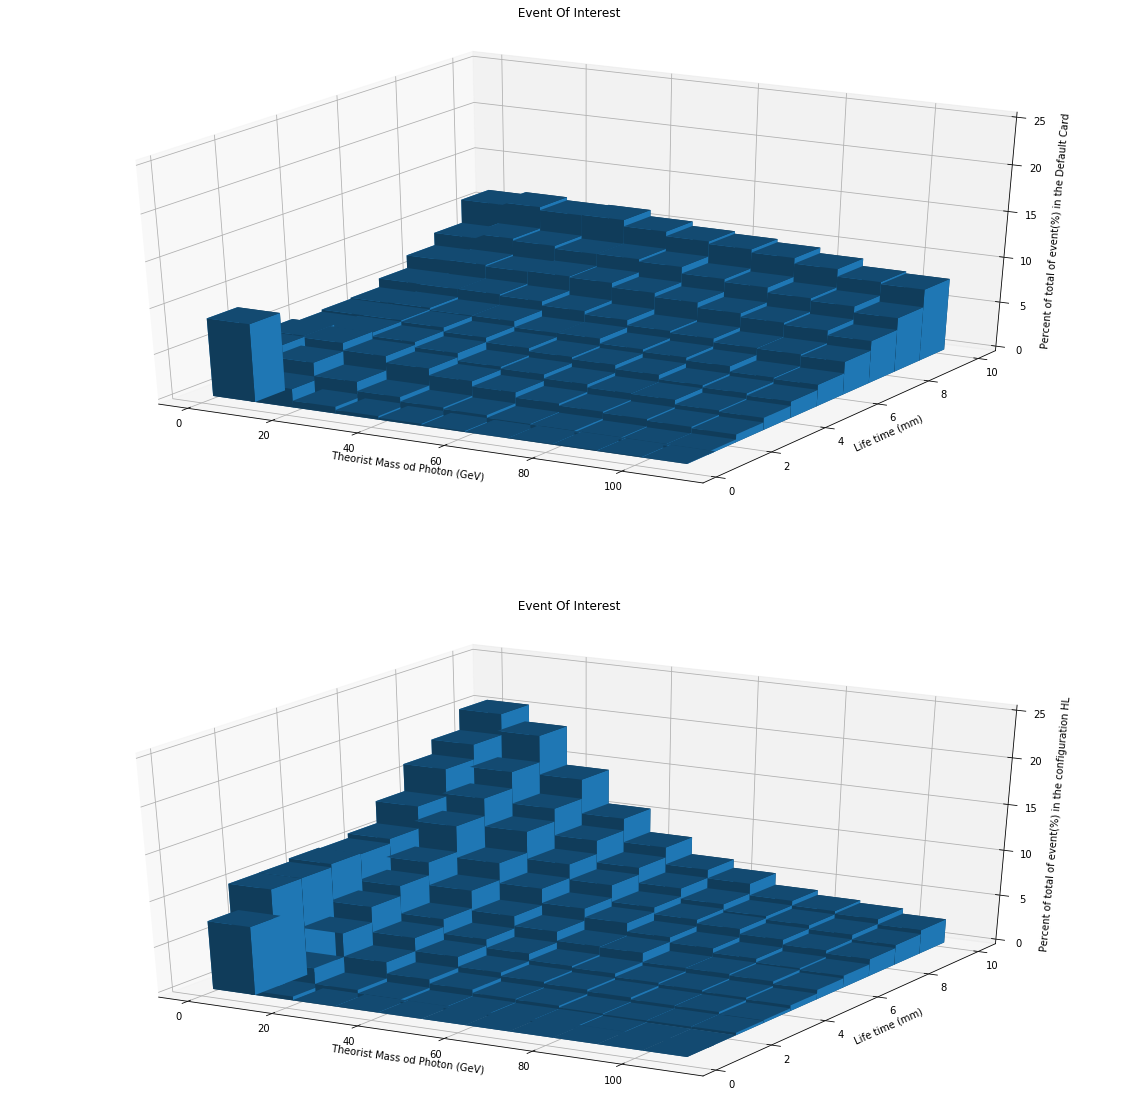

In [8]:
TcPho_m,MPho_m = np.meshgrid(TcPho, MPho)
cmap = cm.get_cmap('jet') 
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.bar3d(TcPho_m.ravel(), MPho_m.ravel(), 0, 10, 1,  Z0.ravel()/100, zsort='average')
ax.set_zlim(0, 25)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%) in the Default Card")

ax = fig.add_subplot(212, projection='3d',)
ax.bar3d(TcPho_m.ravel(), MPho_m.ravel(), 0, 10, 1,  Z1.ravel()/100, zsort='average')
#ax.bar3d(TcPho_m.ravel(), MPho_m.ravel(), 0, 5, .5,  Z1.ravel()/100, zsort='average')
#ax.view_init(90, 90)
ax.set_zlim(0, 25)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%) in the configuration HL")

#print cmap(.2)
plt.savefig("PDF/Seleccion of Event with HL configuracion of detector.pdf")

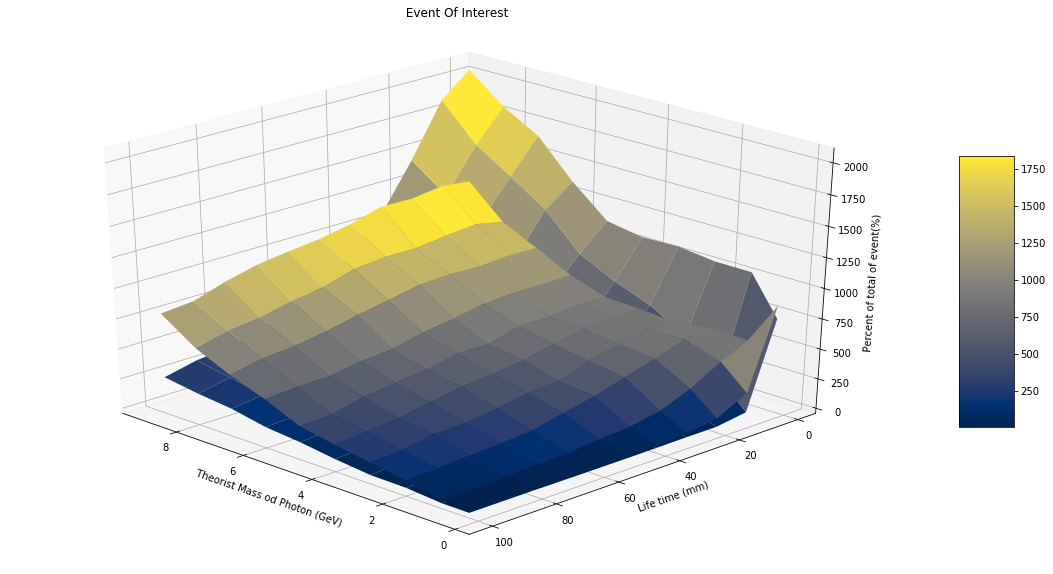

In [13]:
TcPho_m,MPho_m = np.meshgrid(TcPho, MPho)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(MPho_m, 
                TcPho_m, 
                Z0, cmap = 'cividis')

plot = ax.plot_surface(MPho_m, 
                TcPho_m, 
                Z1, cmap = 'cividis')

ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%)")

ax.view_init(30, 135)
fig.colorbar(plot, shrink=0.5, aspect=5)
ax.set_zlim(0, np.max(Z1) + 5)
plt.savefig("PDF/Seleccion of Event with HL configuracion of detector (plot forms).pdf")

In [80]:
print("Event : 10 000")
print("   Mass Photon || Tc = 0          || Tc = 10         ||  Tc = 20        || Tc = 30         "
      "|| Tc = 40         || Tc = 50         || Tc = 60         || Tc = 70         || Tc = 80         "
      "|| Tc = 90         || Tc = 100    ||")
for i in range(Z0.shape[0]):
    text = "MPhoton = " + str(X0[i, 0]) 
    print text,
    # imprimir espacio
    #print len(text)
    for y in range(int((15-len(text)))/4):
		print "\t",
    print "|| ",
    for j in range(Z0.shape[1]): -
        text = str(Z0[i, j]) + "/" + str(Z1[i, j])
        #print "\n" + str(int((25-len(text)))/8)
        print text,
        # imprimir espacio
        for y in range(int(15-len(text))/4):
		    print "\t",
        print "|| ",
    print "\n"  
	
1111

Event : 10 000
   Mass Photon || Tc = 0          || Tc = 10         ||  Tc = 20        || Tc = 30         || Tc = 40         || Tc = 50         || Tc = 60         || Tc = 70         || Tc = 80         || Tc = 90         || Tc = 100    ||
MPhoton = 0.25 ||  858.0/751.0 	||  204.0/43.0 	||  74.0/5.0 	||  39.0/5.0 	||  22.0/2.0 	||  12.0/0.0 	||  3.0/0.0 		||  7.0/0.0 		||  9.0/1.0 		||  7.0/0.0 		||  3.0/0.0 		||  

MPhoton = 1.0 ||  505.0/1067.0 ||  400.0/261.0 	||  254.0/86.0 	||  152.0/48.0 	||  104.0/23.0 	||  87.0/20.0 	||  58.0/15.0 	||  53.0/16.0 	||  36.0/7.0 	||  28.0/2.0 	||  31.0/1.0 	||  

MPhoton = 2.0 ||  514.0/1069.0 ||  493.0/520.0 	||  412.0/265.0 	||  339.0/140.0 	||  265.0/94.0 	||  208.0/57.0 	||  151.0/50.0 	||  130.0/31.0 	||  116.0/24.0 	||  100.0/25.0 	||  85.0/27.0 	||  

MPhoton = 3.0 ||  474.0/1105.0 ||  484.0/690.0 	||  443.0/410.0 	||  384.0/264.0 	||  298.0/155.0 	||  278.0/117.0 	||  235.0/99.0 	||  200.0/79.0 	||  197.0/57.0 	||  148.0/54.0 	||  135.0/31.0

1111

In [ ]:
# histogramas comparativo de cualquier dato contra cualquier dato


bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()



In [ ]:
MPho = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # masa de los photons
TcPho = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # valores de Tc
X0, Y0 = np.meshgrid(MPho, TcPho, sparse=False, indexing='ij')  # MATRIX COMBINADA
Z00 = np.zeros(X0.shape)

In [ ]:
#print X0
#print Y0
# Grafico 3d
# BUSCANDO ARCHIVO
for i in range(Z00.shape[0]):
    for j in range(Z00.shape[1]):
        # localizar el archivo respectivo
        finalfileROOT = None
        for fileROOT in os.listdir("data/"):
            #print X[i, j], Y[i, j], fileROOT
            if (fileROOT.find(".root") != -1) and (fileROOT.find("Mu4_darkSUSY_") != -1):  # verificar que seas
                Mass0 = X0[i, j]
                Mass1 = re.search(V_mass, fileROOT).group(0)
                Tc0 = Y0[i, j]
                Tc1 = re.search(V_tc, fileROOT).group(0)
                Event0 = 10000
                Event1 = re.search(V_event, fileROOT).group(0)
                if float(Event0) == float(Event1) and float(Mass0) == float(Mass1) and float(Tc0) == float(Tc1):
                    finalfileROOT = fileROOT
                    #print("El archivo fue encontrado: " + fileROOT)
                    DarkFile.Add_File("data/" + fileROOT)
                    #DarkFile.Select_two_dimuon()
                    Z00[i, j] = DarkFile.Entries
                    break
                #else:
                #    print("Archivo root correspondiente no encontrado")
        if finalfileROOT == None:
            print X0[i, j], Y0[i, j], " File correspondiente no fue encontrado"
            quit()
        #print i, j
        #print j

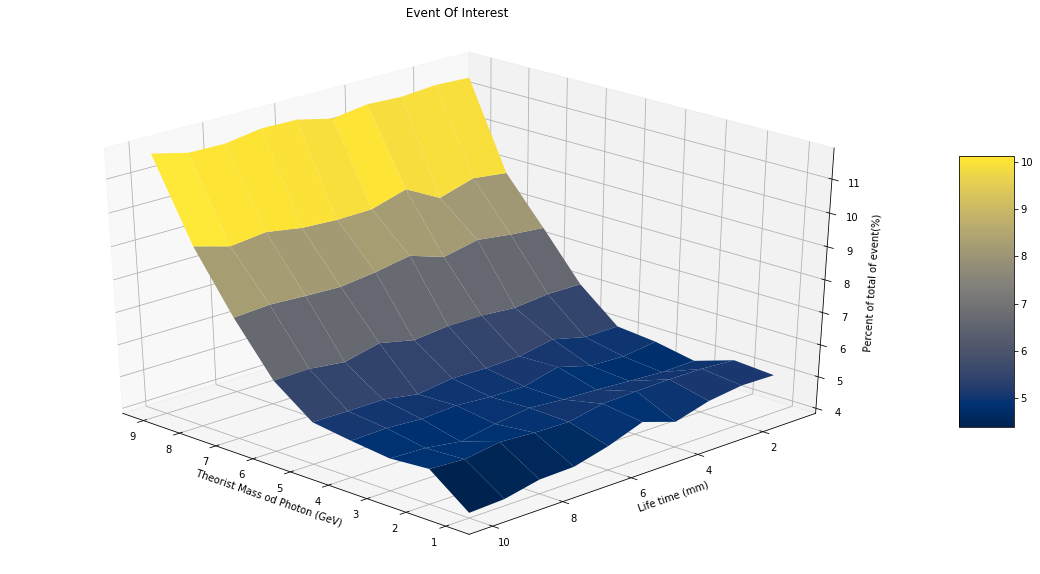

In [6]:
TcPho_m,MPho_m = np.meshgrid(TcPho, MPho)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(MPho_m, 
                TcPho_m, 
                Z00/100, cmap = 'cividis')

ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%)")


ax.view_init(30, 135)
fig.colorbar(plot, shrink=0.5, aspect=5)

plt.savefig("Seleccion 2 of Event with HL configuracion of detector.pdf")

In [ ]:
## PARA HL




